# SyriaTel Telecom Customer Churn Prediction 
## 1. Business Understanding
###  Business Problem
In the highly competitive telecommunications industry, customer retention is one of the most important drivers of profitability. Acquiring new customers is often more expensive than retaining existing ones, and high churn (customer dropout) can significantly impact revenue and long-term growth.
SyrialTel, a telecommunications provider is losing revenue due to customer churn. Customer churn is the act of customers ceasing their subscriptions or leaving the service. Reducing churn is crucial for maintaining a stable customer base and profitability.
The current system lacks a predictive mechanism to identify customers at risk of churning, meaning the business is reactive rather than proactive in handling customer dissatisfaction. This limits the ability of the Customer Retention and Marketing teams to design timely and targeted interventions (e.g., special offers, upgrades, or customer service outreach).

### Business Objective
The goal is to develop a **machine learning classification model** that predicts whether a customer will churn using available customer data.

To solve this problem, I will:

    - Use Logistic regression as a baseline model
    - Build a decision tree classifier as an improved, non linear model with tuned hyperparameters.
    - Build a gradient boosting classifier for an overall improved model.
    - Present actionable insights

### Stakeholder
SyrialTel's Marketing and Customer Retention team who will use the model's predictions to design targeted campaigns to reduce churn.

## 2. Data Understanding
The dataset being used for this project was obtained from kaggle. The dataset is reviewed to access the structure and characteristics of the data.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn import tree

In [2]:
df = pd.read_csv('customer-churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# statistical summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Preparation
Before analysis and modeling, it is essential to clean the dataset to ensure accuracy and reliability. In this step, I handle missing values, remove irrelevant features and convert categorical variables and numerical formats. This prepares the data for effective exploration and model building.

In [6]:
# drop irrelevant columns
df.drop(columns=['phone number', 'state', 'area code'], axis =1, inplace=True )

In [7]:
# checking for duplicates
df.duplicated().sum()

0

In [8]:
# Check for missing values
df.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
# Convert boolean to integer
df['churn'] = df['churn'].astype(int)

In [10]:
# encoding the categorical features
categorical = ['international plan', 'voice mail plan', 'churn']

encoder = OneHotEncoder(drop='first', sparse=False)

# fit and transform the categorical columns
encoded_array = encoder.fit_transform(df[categorical])

# encoded feature names
encoded_cols = encoder.get_feature_names(categorical)


In [11]:
# convert to dataframe
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Drop original categorical columns and concatenate the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=categorical), encoded_df], axis=1)

In [12]:
df_encoded

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes,churn_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0.0,1.0,0.0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0.0,0.0,0.0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0.0,0.0,0.0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,1.0,0.0,0.0


## Exploratory Data Analysis(EDA)
In this section , I explore the dataset to better understand the distribution, relationships and patterns among the variables that may influence customer churn. I begin by examining the distribution of numerical and categorical features, identifying correlations with the target variable (`churn`), and checking for any class imbalances or anomalies. This analysis provided crucial insights that wiill guide the choice of features and preprocessing steps for modeling.

1. Class Distribution

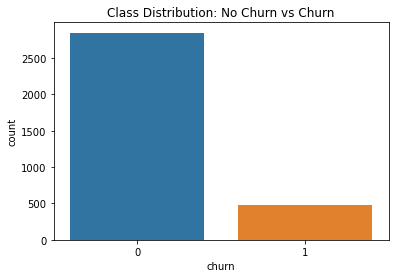

In [13]:
# checking for class imbalance
df_encoded['churn_1'].value_counts(normalize=True)

import seaborn as sns
sns.countplot(x='churn', data=df)
plt.title('Class Distribution: No Churn vs Churn')
plt.show()

Insights from the chart:
- The bar for `0`(No churn) is significantly taller than that for `1`(Churn), indicating that most customers stayed with the service.
- There is class imbalance which will be handled before modelling

2. Categorical Feature Analysis

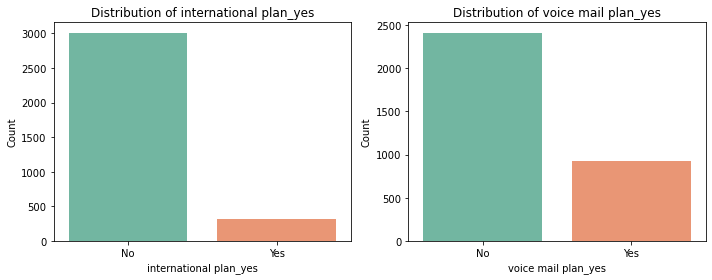

In [14]:
# List the one-hot encoded categorical columns
encoded_cat_features = ['international plan_yes', 'voice mail plan_yes']

# Create subplots
fig, axes = plt.subplots(1, len(encoded_cat_features), figsize=(10, 4))

# If there's only one subplot, convert axes to a list
if len(encoded_cat_features) == 1:
    axes = [axes]

# Loop through each feature and plot
for i, col in enumerate(encoded_cat_features):
    sns.countplot(data=df_encoded, x=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


Insights from the chart above:

**International plan**
- A majority of customers do not have an international plan

**Voice mail plan**
- Most customers still do not have the plan, but the gap is smaller compared to the international plan
- Both plans are less popular than not having them, but the voice mail plan has a higher adoption rate.

3.Numerical features

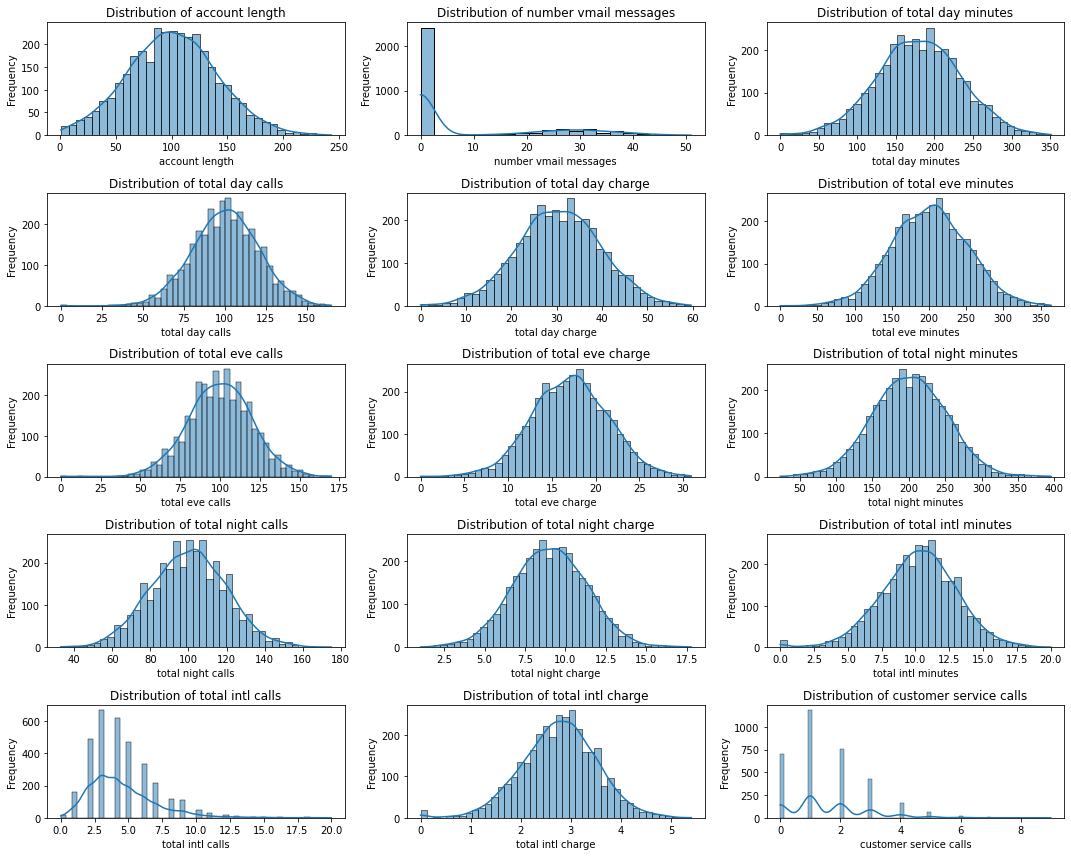

In [15]:
# Drop the categorical features using correct column names
numerical = df_encoded.drop(columns=['international plan_yes', 'voice mail plan_yes', 'churn_1'], axis=1)

# Create subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical.columns):
    sns.histplot(data=df_encoded, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Insights from the above:
- `Account length`, `total day minutes/calls/charge`, `total eve minutes/calls/charge`, `total night minutes/calls/charge` and `total intl minutes/charge` have a **roughly normal distribution**, indicating balanced usage.
- `Number Vmail messages`, `customer service calls` and `total intl calls` are **right skewed** showing most users have few or zero voicemail messages, few calls and few international calls respectively.
- Total charges (day, evening, night, international) mirror the distributions of their respective minute features, which is expected since charges are typically proportional to usage.
- The spike in customer service calls around 1–3 might indicate a common pain point or need for support in those instances.

4. Correlation Distribution

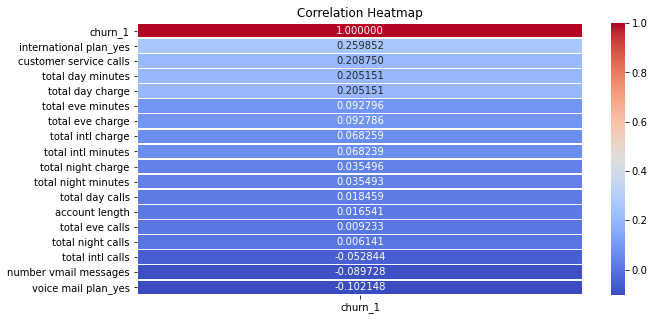

In [16]:
correlation_matrix = df_encoded.corr()['churn_1'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insights from above:
- `International plan`, `customer service calls`, `total day minutes`, `total day charge` are **positively correlated** with churn, indicating they are more likely associated with customers who churn.

- `Voice mail plan`, `number of vmail messages`, `total intl calls` are **negatively correlated** with churn and are more common among customers who did not churn.

- Variables like `account length`, `total night calls`, or `total evening calls` show very weak or no correlation with churn, suggesting they don’t significantly impact churn prediction directly.

## Modelling & Evaluation
- To predict customer churn effectively, I begin by addressing class imbalance using the SMOTE technique, which synthetically balances the dataset. 

- Afterward, I standardize the features to ensure all variables contribute equally to model training. 

- Model Used are:
    - **logistic regression** as a baseline model due to its simplicity, interpretability, and efficiency in handling binary classification tasks. Logistic regression also provides insights into feature importance and the likelihood of churn.
    - **Tuned decision tree classifier** To capture more complex, non-linear relationships in the data.
    - By optimizing its hyperparameters, we ensure better generalization and reduce the risk of overfitting. 
    - Using both models allows us to balance interpretability and predictive performance, providing a comprehensive approach to understanding and anticipating customer churn.


1. Train Test Split

In [33]:
# creating features and target
X = df_encoded.drop(columns=['churn_1'], axis=1)
y = df_encoded['churn_1']

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Solving class imbalance using SMOTE

I first addressed class imbalance using SMOTE(Synthetic Minority Over-sampling Technique) which generates synthetic examples of the minority class to balance the dataset.

In [35]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# check class distribution after smote
print('After smote')
print(y_train_resampled.value_counts(normalize=True))

After smote
1.0    0.5
0.0    0.5
Name: churn_1, dtype: float64


3. Standardizing

I standardized all my numerical features using standardscaler to ensure all variables contribute equally to the model and improve convergence during optimization.

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#### Model 1 : Logistic Regression
It is used as a baseline due to its interpretability and suitability for binary classification tasks.

In [37]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_lr = log_reg.predict(X_test_scaled)

#### Logistic model evaluation

In [38]:
# Evaluate performance
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.76      0.84       566
         1.0       0.35      0.71      0.47       101

    accuracy                           0.76       667
   macro avg       0.64      0.74      0.66       667
weighted avg       0.85      0.76      0.78       667

Accuracy Score: 0.7556221889055472


Interpretation from above:
- *Precision*: the model predicts that 94% of customers are non-churners and 35% of customers churn.
- *Recall*: The model was able to correctly predict 76% of customers did not churn and 71% are actually churned.
- *F1-score*: There is a good balance between precision and recall for the no-churn class. Meanwhile, there is a poor overall performance on the churn class due to low precision.
- *Accuracy*: The model correctly predicts the outcome for 76% of customers. However, due to class imbalance, this metric is misleading on its own.

##### ROC curve and AUC
This is a graphical representation of the diagnostic ability of the logistic regression model for predicting customer churn as the classification threshold is varied.

In [39]:
# Predict probabilities
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc_score = roc_auc_score(y_test, y_proba_lr)


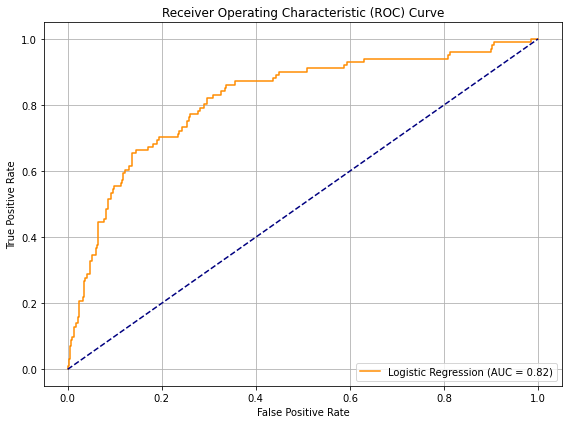

In [40]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation of the Above:
- AUC(0.82): This means there is an 82% chance the model will rank a randomly chosen churner higher than a randomly chosen non-churner in terms of prdicted probability.
- The curve rises steeply towardds the top-left corner, which signifies high sensitivity(recall) at relatively low positive rates.
- This model performs reasonably well in distinguishing between the two classes.


#### Model 2: Tuned Decision Tree Classifier
- I used it for its simplicity and interpretability and used `GridSearchCV` for hyperparameter tuning prevent overfitting and improve accuracy

In [41]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {
    'max_depth':[3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [42]:
# initialize the base model
dtc = DecisionTreeClassifier(random_state=42)

In [43]:
# set up gridsearch cv
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv = 5, scoring='accuracy')

# fit on the resampled and scaled training data
grid_search.fit(X_train_scaled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [44]:
# get best method
best_dtc = grid_search.best_estimator_

# predict on the test data
y_pred_dtc = best_dtc.predict(X_test_scaled)

#### Model Evaluation

In [45]:
# Evaluate performance
print("Best Hyperparameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred_dtc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dtc))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Accuracy: 0.9025487256371814

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       566
         1.0       0.65      0.76      0.70       101

    accuracy                           0.90       667
   macro avg       0.80      0.84      0.82       667
weighted avg       0.91      0.90      0.91       667



Interpretation from the above:
- *Precision*: The model predicts 96% of customers are non-churners and 65% of customers churn.
- *Recall*: The model correctly identifies that 93% of actual non-churners and captures 76% of actual churners. This is a significant improvement over the logistic regression model which was 71%.
- *F1-score*: This shows excellent performance for the non-churn class and also solid, balanced performance on the minority class.
- *Accuracy*: There is a strong improvement over the logistic regression model from 76% to 90%.

ROC-AUC  curve

In [46]:
# probalities
y_proba_dtc = best_dtc.predict_proba(X_test_scaled)[:, 1]

# compute ROC Curves and AUC
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_proba_dtc)
auc_score_dtc = roc_auc_score(y_test, y_proba_dtc)


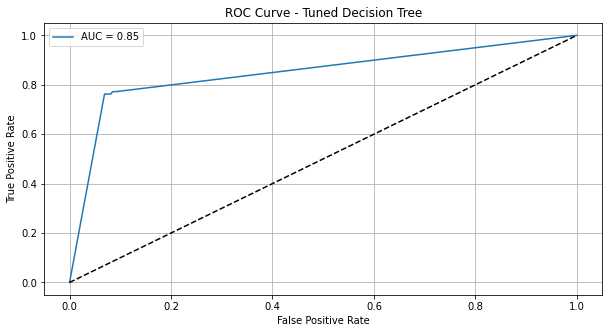

In [47]:
#roc curve
plt.figure(figsize=(10,5))
plt.plot(fpr_dtc, tpr_dtc, label=f'AUC = {auc_score_dtc:.2f}')
plt.plot([0,1], [0,1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

- AUC(0.85): This means that the model is able to distinguish between churners and non-churners 85% of the time which is a very good result.
- The ROC curve rises sharply toward the top left corner, indicating a high true positive rate (TPR) at low false positive rates(FPR).

#### Model 3: Gradient Boosting Classifier 
- It is used for its ability to build a strong predictive model by combining multiple weak learners, making it particularly powerful in capturing complex patterns in the data.

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train_scaled, y_train_resampled)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test_scaled)
y_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]


#### Model Evaluation

In [50]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("AUC Score:", roc_auc_score(y_test, y_proba_gb))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       566
         1.0       0.75      0.82      0.78       101

    accuracy                           0.93       667
   macro avg       0.86      0.89      0.87       667
weighted avg       0.93      0.93      0.93       667

AUC Score: 0.9170835811496344


Interpretation from the above:
- *Precision*: The model predicts 97% of customers are non-churners and 75% of customers churn.
- *Recall*: The model correctly identifies that 95% of actual non-churners and captures 82% of actual churners. This is a significant improvement over the logistic regression model which was 71% and the tuned decision tree model which was 76%.
- *F1-score*: This shows excellent performance for the non-churn class of 96% and also solid, balanced performance on the minority class of 78%.
- *Accuracy*: There is a strong improvement over the decision model tree from 90% to 92%.

ROC-AUC  curve

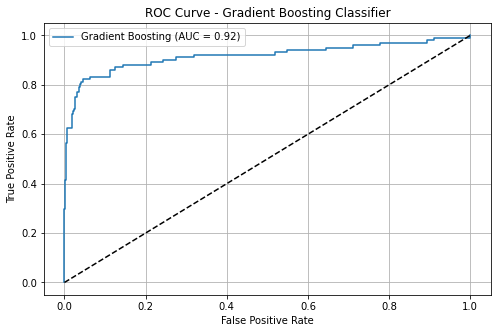

In [51]:
# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(8, 5))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_proba_gb):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend()
plt.grid(True)
plt.show()


There is an increase in the AUC score from 85% to 92% showing an increase in the model's performance.

### Comparison between Logistic Regression , Tuned Decision Tree Model and Gradient Boosting Classifier.

1. **Overall Accuracy**
- *Logistic Regression*: The accuracy is 0.76 which the lowest of the three models.

- *Tuned Decision Tree Classifier*: The accuracy is 0.90 which is an improvement from the logistic regression model.

- *Gradient Boosting Classifier*: An accuracy of 0.92, reflecting the model's ability to predict non-churn cases with high recall. The model's high precision for both classes boosts its overall performance.

2. **Classification Report**
- *Logistic regression*: It performs relatively well in predicting non-churn customers, but still misses 35% of them. While the recall is higher for churn customers(71% of actual churn cases are detected), precision is low meaning many predicted churn customers are false positive. While it's a simple and interpretable model, its overall performance—especially the low F1-score for churners (0.47)—makes it less reliable for business decisions where targeting actual churners accurately is critical. 

- *Tuned Decision Tree Classifier*: It significantly outperformed the logistic regression model with better precision (65%) and recall(76%) for the churn class, indicating a much more balanced and effective performance.

- *Gradient Boosting Classifier*: outperformed the baseline logistic  model and decision tree in key classification metrics. It achieved higher precision, recall, and F1-score, particularly for the churn class, indicating better balance between false positives and false negatives.

3. **ROC-AUC score**
- *Logistic Regression (0.82)*: The model is able to distinguish between churn and non-churn customers with fair accuracy.Even if it is a good model, there is room for improvement and improving recall for churn.

- *Tuned Decision Tree Classifier(0.85)*:There is a slight improvement in the AUC score from the logistic regression but the ROC curve shape indicates high true positive rate (TPR) at low false positive rates(FPR).
- *Gradient Boosting Classifier(0.92)*:The model the highest ROC AUC as compared to the other two models, suggesting stronger generalization and better separation between churners and non-churners.

4. **ROC Curve**

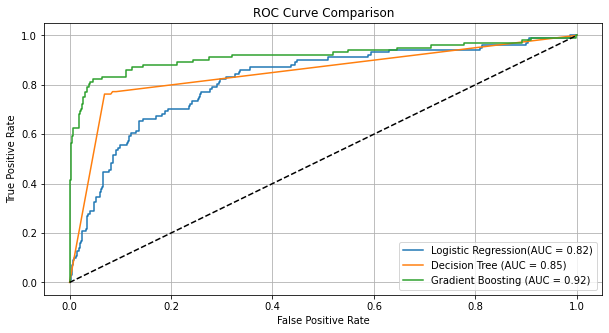

In [52]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label = f'Logistic Regression(AUC = {auc_score:.2f})')
plt.plot(fpr_dtc, tpr_dtc, label = f'Decision Tree (AUC = {auc_score_dtc:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_proba_gb):.2f})')
plt.plot([0,1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- The closer the ROC curve is to the top-left corner, the better the model's performance. 
- Gradient Boosting shows a better trade-off between True Positive Rate (Sensitivity/Recall) and False Positive Rate, making it the superior model for churn prediction.
- Logistic Regression, while performing decently, has a lower ability to correctly classify churn cases compared to Random Forest.

## Feature Importance
To understand which features most influence the model's predictions, I examined the feature importance scores derived from the **Gradient Boosting Classifier**. This helps the identify the most relevant variables contributing to churn, guiding both model interpretation and potential business actions. By vvisualizing these importances, we gain insights into which customers attributes have the greatest impact on churn prediction. 

In [53]:
# get feature importance from the trained gradient boosting model
importances = gb_model.feature_importances_

# match them to the feature names
feature_names = X_train_resampled.columns

# create a dataframe 
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

feature_importance_df

,Feature,importance
15,international plan_yes,0.278928
14,customer service calls,0.190835
2,total day minutes,0.147080
4,total day charge,0.119257
16,voice mail plan_yes,0.095352
5,total eve minutes,0.041712
12,total intl calls,0.037854
11,total intl minutes,0.017895
7,total eve charge,0.017483
13,total intl charge,0.013788


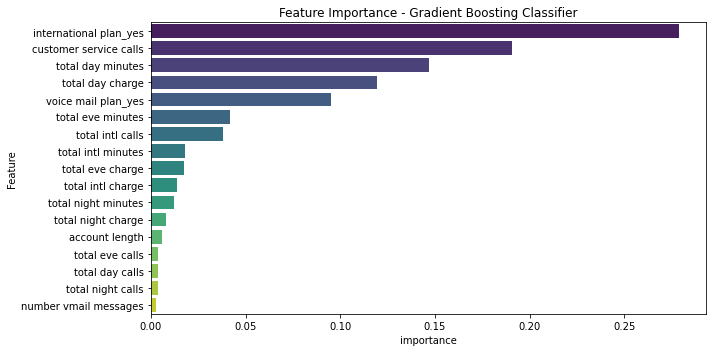

In [54]:
# plot
plt.figure(figsize=(10,5))
sns.barplot(data = feature_importance_df, x='importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

-  The most influential features are **international plan_yes** and **customer service calls**, indicating that customers with international plans or those frequently contacting support are strong predictors in the model (likely for churn or similar behavior).

- Daytime usage metrics (**total day minutes** and **total day charge**) significantly impact predictions, showing that how much customers use services during the day is a key behavioral indicator.

- Several features like **account length**, **number vmail messages**, and night/evening call metrics have minimal impact, suggesting they could be de-prioritized or removed to simplify the model without losing much predictive power.

### Recommendations

1. Adopt Gradient Boosting for Churn Prediction.
Gradient Boosting outperformed Logistic Regression and the Decision Tree model in terms of ROC-AUC and overall classification metrics. It captures complex, non-linear relationships in the data, making it well-suited for identifying churn patterns. It is recommended for deployment in churn prediction tasks, especially when accuracy and predictive power are top priorities.

2. Monitor Model Bias and Interpretability.
While Gradient Boosting offers high accuracy, it is less interpretable than Logistic Regression. For business stakeholders who prioritize transparency, combining a simpler interpretable model (like Logistic Regression) with Gradient Boosting could be a balanced approach. Additionally, ensure that the model does not inadvertently learn biases from the data (e.g., class imbalance or overfitting on minority classes).

3. Continuous Update and validate the models
The models were trained on a static dataset. As customer behavior and service offerings evolve, model performance may degrade over time. Regular retraining with fresh data, along with monitoring performance metrics like precision, recall, and ROC-AUC, will help maintain accuracy.

- Some of the limitations are:
   - The model relies heavily on input data and the data changes over time, the model's accuracy may drop.

### Conclusion
In this project, I explored customer churn using various models, including Logistic Regression, Tuned Decision Tree and Gradient Boosting. After handling class imbalance and standardizing our features, I evaluated model performance using metrics like ROC-AUC and feature importance. While the models showed promising results, their effectiveness depends on data quality and regular updates. 